In [1]:
import pylab as plt 
import pandas as pd
import numpy as np
from astropy.constants import R_earth, m_e, c
from astropy import units
from tqdm import tqdm

In [2]:
from plotting_utils import add_earth

In [3]:
def plot(df_sub, fname=None):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    cmap = plt.get_cmap('viridis')
    for i in [0]:#range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'z{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Z (SM)')
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.xlim(-1, 7)
    plt.ylim(-3, 3)
    add_earth()
    plt.gca().set_aspect("equal")
        
    plt.subplot(122)
    cmap = plt.get_cmap('viridis')
    for i in [0]:#range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'y{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Y (SM)')
    plt.xlim(-1, 7)
    plt.ylim(-7, 7)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    add_earth()
    plt.gca().set_aspect("equal")
    
    if fname:
        plt.savefig(fname)
        plt.close()


In [23]:
df = pd.read_csv('data/test_dipole.csv')
print(len(df.index))

853


In [5]:
df.head()

,Unnamed: 0,t0,x0,y0,z0,ppar0,B0,W0,h0
0,0,0.000010,6.600000,6.618732e-07,0.000001,0.338600,-8.312879,1.742427,0.000124
1,1,0.000134,6.600000,8.831111e-06,0.000016,0.338600,-8.312878,1.742427,0.000818
2,2,0.000952,6.600000,6.279343e-05,0.000117,0.338600,-8.312873,1.742426,0.003371
3,3,0.004324,6.600000,2.851365e-04,0.000533,0.338599,-8.312855,1.742424,0.009750
4,4,0.014074,6.599999,9.281607e-04,0.001734,0.338597,-8.312801,1.742416,0.021623


Text(0.5, 0, 'Time (seconds)')

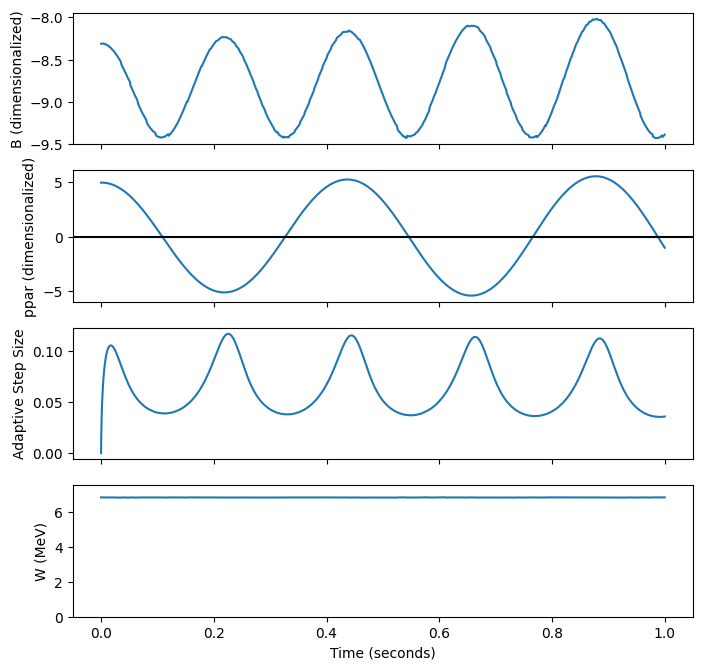

In [27]:
sf = c / R_earth
t = (df['t0'].values / sf).to(units.s).value
W = (df['W0'].values * (m_e * c**2)).to(units.MeV).value

fig, axes = plt.subplots(4, 1,sharex=True, figsize=(8, 8), dpi=100)
axes[0].plot(t, df['B0'], '-')
axes[0].set_ylabel('B (dimensionalized)')
axes[1].plot(t, df['ppar0'], '-')
axes[1].set_ylabel('ppar (dimensionalized)')
axes[1].axhline(0, color='k')
axes[2].plot(t, df['h0'], '-')
axes[2].set_ylabel('Adaptive Step Size')
axes[3].plot(t, W, '-')
axes[3].set_ylabel('W (MeV)')
axes[3].set_ylim(0, W.max() * 1.1)
axes[3].set_xlabel('Time (seconds)')

(0.0, 14.765493933151797)

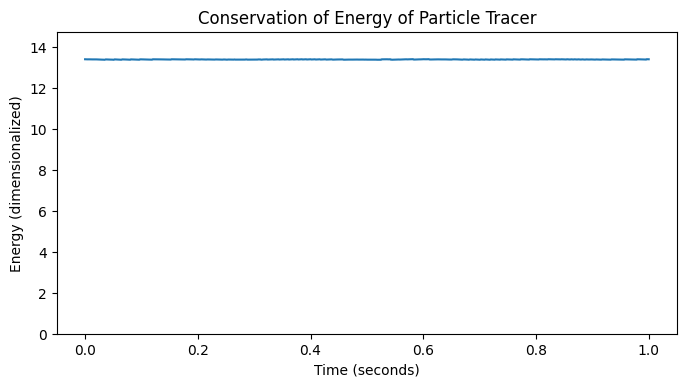

In [24]:


B_units = units.s / units.km
M_units = units.km / units.s
sf = c / R_earth
t = (df['t0'].values / sf).to(units.s).value
W = df['W0'].values 

plt.figure(figsize=(8, 4), dpi=100, facecolor='white')
plt.plot(t, df['W0'], '-')
plt.ylabel('Energy (dimensionalized)')
plt.xlabel('Time (seconds)')
plt.title('Conservation of Energy of Particle Tracer')
plt.ylim(0, W.max()*1.1)

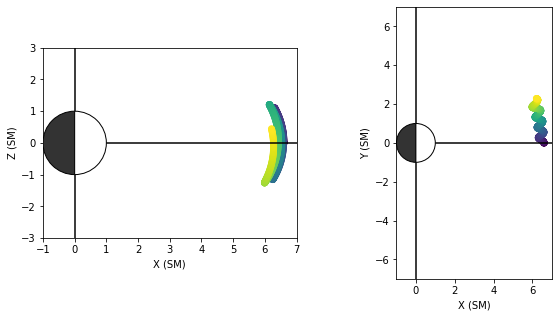

In [17]:
plot(df)

In [9]:
import joblib
tasks = []

for i in range(len(df.index)):
    tasks.append(joblib.delayed(plot)(df.iloc[i:i+100], 'plots/%04d.png' % i))
    
print(f'Tasks: {len(tasks)}')

joblib.Parallel(n_jobs=-1, verbose=1)(tasks)

Tasks: 5000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 10.5min finished


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,